<a href="https://colab.research.google.com/github/fpelogia/Optimization-and-Neural-Networks/blob/master/RedesNeurais_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Redes Neurais
[Voltar](https://colab.research.google.com/drive/1zGxVatpjlZtdtECAikT1eKP7EQ50m-Ur)

#3 Função de Ativação $max(x,0)$


##3.1 - Na camada oculta e no output


###3.1.1 - Arredondando derivada para cima

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def act_func(x):
    return x

def reLu(x):
    return max(x,0.0)
 
class RedeNeural():
    def __init__(self, n_inputs,n_hidden,n_outputs,learning_rate = 0.1):
        self.n_inputs = n_inputs
        self.n_hidden = n_hidden
        self.n_outputs = n_outputs
        
        
        
        self.weight_ih = np.random.normal(0.0, pow(self.n_inputs, -0.5),
(self.n_hidden, self.n_inputs))
        
        
        self.weight_ih = np.transpose(self.weight_ih)
        self.weight_ho = np.random.normal(0.0, pow(self.n_hidden, -0.5),
(self.n_outputs, self.n_hidden))
        self.weight_ho = np.transpose(self.weight_ho)
        self.learning_rate = learning_rate
        

    def train_step(self, input,target):
        #np.dot : simples multiplicacao matricial
   

        #  INPUT ====> HIDDEN
                 
        hidden = np.dot(input, self.weight_ih)
        for i in range(self.n_hidden):
            hidden[0][i] = reLu(hidden[0][i])
    
        #  HIDDEN ====> OUTPUT

        output = np.dot(hidden,self.weight_ho)
        for i in range(len(output)):
            output[i] = reLu(output[i])
        
        
        
        
        #BACKPROPAGATION
        ## OUTPUT ==> HIDDEN 
        output_error = target - output
        
        d_output = output
        d_output[d_output < 0.0] = 0.0
        d_output[d_output >= 0.0] = 1.0
        gradient = self.learning_rate*output_error*d_output
        
        weight_ho_deltas = np.dot(np.transpose(hidden),gradient)
        self.weight_ho = np.add(self.weight_ho,weight_ho_deltas)
        
        ## HIDDEN ==> INPUT
        hidden_error = np.dot(output_error,np.transpose(self.weight_ho))
        
        d_hidden = hidden
        d_hidden[d_hidden<0.0] = 0.0
        d_hidden[d_hidden>=0.0] = 1.0
        gradient_H = self.learning_rate*hidden_error*d_hidden
       
        weight_ih_deltas = np.dot(np.transpose(input),gradient_H)
        self.weight_ih = np.add(self.weight_ih,weight_ih_deltas)

        

    def predict(self,input):

        hidden = np.dot(input, self.weight_ih)

        for i in range(len(hidden)):
            hidden[i] = reLu(hidden[i])
     
        #  HIDDEN ====> OUTPUT

        output = np.dot(hidden,self.weight_ho)
        for i in range(len(output)):
            output[i] = reLu(output[i])

        return output[0]
    
    
    def train(self, trainning_set, labels, epochs=1000):
        
        inputs = np.array(trainning_set)
        
        
        for _ in range(epochs):
            index  = np.random.randint(len(trainning_set))
            self.train_step(inputs[index],labels[index])




[3.99000179]


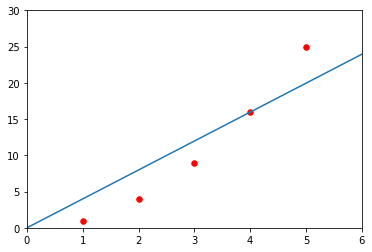

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

mynn = RedeNeural(1,2,1,0.00005);
X = [1,2,3,4,5]
y = [1,4,9,16,25]

mynn.train(X,y,10000)


a = mynn.weight_ih[0]
b = mynn.weight_ho

m = a[0]*b[0] + a[1]*b[1]
print(m)

ex = np.linspace(0,6,10)
ey = m*ex

plt.axis([0,6,0,30])
plt.scatter(X,y,s = 30, c = "red")
plt.plot(ex,ey)


###3.1.2 - Arredondando a derivada para baixo

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def act_func(x):
    return x

def reLu(x):
    return max(x,0.0)

class RedeNeural():
    def __init__(self, n_inputs,n_hidden,n_outputs,learning_rate = 0.1):
        self.n_inputs = n_inputs
        self.n_hidden = n_hidden
        self.n_outputs = n_outputs
     
        self.weight_ih = np.random.normal(0.0, pow(self.n_inputs, -0.5),
(self.n_hidden, self.n_inputs))

        self.weight_ih = np.transpose(self.weight_ih)
        self.weight_ho = np.random.normal(0.0, pow(self.n_hidden, -0.5),
(self.n_outputs, self.n_hidden))
        self.weight_ho = np.transpose(self.weight_ho)
        self.learning_rate = learning_rate

    def train_step(self, input,target):

        #  INPUT ====> HIDDEN
        hidden = np.dot(input, self.weight_ih)
        for i in range(self.n_hidden):
            hidden[0][i] = reLu(hidden[0][i])
    
        #  HIDDEN ====> OUTPUT

        output = np.dot(hidden,self.weight_ho)
        for i in range(len(output)):
            output[i] = reLu(output[i])
        
        
        
        
        #BACKPROPAGATION
        
        ## OUTPUT ==> HIDDEN 
        
        output_error = target - output
        d_output = output
        d_output[d_output <= 0.0] = 0.0
        d_output[d_output > 0.0] = 1.0
        gradient = self.learning_rate*output_error*d_output

        weight_ho_deltas = np.dot(np.transpose(hidden),gradient)
        self.weight_ho = np.add(self.weight_ho,weight_ho_deltas)
        
        ## HIDDEN ==> INPUT
        
        hidden_error = np.dot(output_error,np.transpose(self.weight_ho))
        d_hidden = hidden
        d_hidden[d_hidden<=0.0] = 0.0
        d_hidden[d_hidden>0.0] = 1.0
        gradient_H = self.learning_rate*hidden_error*d_hidden

        weight_ih_deltas = np.dot(np.transpose(input),gradient_H)
        self.weight_ih = np.add(self.weight_ih,weight_ih_deltas)

        

    def predict(self,input):

        hidden = np.dot(input, self.weight_ih)
        for i in range(len(hidden)):
            hidden[i] = reLu(hidden[i])
     
        #  HIDDEN ====> OUTPUT

        output = np.dot(hidden,self.weight_ho)
        for i in range(len(output)):
            output[i] = reLu(output[i])

        return output[0]
    
    
    def train(self, trainning_set, labels, epochs=1000):
        
        inputs = np.array(trainning_set)
        
        
        for _ in range(epochs):
            index  = np.random.randint(len(trainning_set))
            self.train_step(inputs[index],labels[index])





[4.22430928]


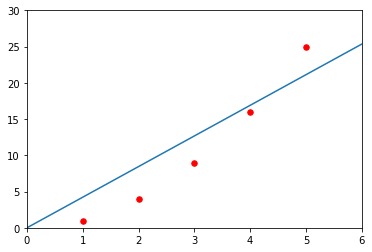

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

mynn = RedeNeural(1,2,1,0.00005);
X = [1,2,3,4,5]
y = [1,4,9,16,25]

mynn.train(X,y,10000)


a = mynn.weight_ih[0]
b = mynn.weight_ho

m = a[0]*b[0] + a[1]*b[1]
print(m)

ex = np.linspace(0,6,10)
ey = m*ex

plt.axis([0,6,0,30])
plt.scatter(X,y,s = 30, c = "red")
plt.plot(ex,ey)


###3.1.3 - Definindo 0.5 para o caso médio

In [0]:

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def act_func(x):
    return x

def reLu(x):
    return max(x,0.0)


class RedeNeural():
    def __init__(self, n_inputs,n_hidden,n_outputs,learning_rate = 0.1):
        self.n_inputs = n_inputs
        self.n_hidden = n_hidden
        self.n_outputs = n_outputs
        
        
        self.weight_ih = np.random.normal(0.0, pow(self.n_inputs, -0.5),
(self.n_hidden, self.n_inputs))
        
        
        self.weight_ih = np.transpose(self.weight_ih)
        self.weight_ho = np.random.normal(0.0, pow(self.n_hidden, -0.5),
(self.n_outputs, self.n_hidden))
        self.weight_ho = np.transpose(self.weight_ho)
        self.learning_rate = learning_rate

    def train_step(self, input,target):
        #np.dot : simples multiplicacao matricial
   

        #  INPUT ====> HIDDEN
    
        hidden = np.dot(input, self.weight_ih)
        for i in range(self.n_hidden):
            hidden[0][i] = reLu(hidden[0][i])
    
        #  HIDDEN ====> OUTPUT

        output = np.dot(hidden,self.weight_ho)
        for i in range(len(output)):
            output[i] = reLu(output[i])
        
        
        
        
        #BACKPROPAGATION
        ## OUTPUT ==> HIDDEN 
        output_error = target - output
        
        d_output = output
        d_output[d_output < 0.0] = 0.0
        d_output[d_output > 0.0] = 1.0
        d_output[d_output == 0.0] = 0.5
        gradient = self.learning_rate*output_error*d_output
        
        weight_ho_deltas = np.dot(np.transpose(hidden),gradient)
        self.weight_ho = np.add(self.weight_ho,weight_ho_deltas)
        
        ## HIDDEN ==> INPUT
        
        hidden_error = np.dot(output_error,np.transpose(self.weight_ho))
        d_hidden = hidden
        d_hidden[d_hidden<0.0] = 0.0
        d_hidden[d_hidden>0.0] = 1.0
        d_hidden[d_hidden==0.0] = 0.5
        gradient_H = self.learning_rate*hidden_error*d_hidden
       
        weight_ih_deltas = np.dot(np.transpose(input),gradient_H)
        self.weight_ih = np.add(self.weight_ih,weight_ih_deltas)

        

    def predict(self,input):

        hidden = np.dot(input, self.weight_ih)
        for i in range(len(hidden)):
            hidden[i] = reLu(hidden[i])
     
        #  HIDDEN ====> OUTPUT

        output = np.dot(hidden,self.weight_ho)
        for i in range(len(output)):
            output[i] = reLu(output[i])

        return output[0]
    
    
    def train(self, trainning_set, labels, epochs=1000):
        
        inputs = np.array(trainning_set)
        
        
        for _ in range(epochs):
            index  = np.random.randint(len(trainning_set))
            self.train_step(inputs[index],labels[index])






[4.53746875]


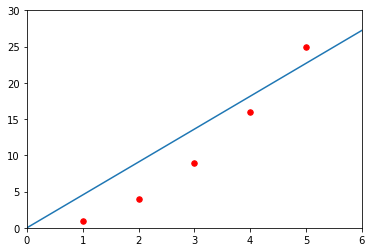

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

mynn = RedeNeural(1,2,1,0.00005);
X = [1,2,3,4,5]
y = [1,4,9,16,25]

mynn.train(X,y,100000)


a = mynn.weight_ih[0]
b = mynn.weight_ho

m = a[0]*b[0] + a[1]*b[1]
print(m)


ex = np.linspace(0,6,10)
ey = m*ex

plt.axis([0,6,0,30])
plt.scatter(X,y,s = 30, c = "red")
plt.plot(ex,ey)


##3.2 - Utilzando $max(x,0)$ na oculta e $y = x$ no output

###3.2.1 - Arredondando a derivada para cima

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def act_func(x):
    return x

def reLu(x):
    return max(x,0.0)

class RedeNeural():
    def __init__(self, n_inputs,n_hidden,n_outputs,learning_rate = 0.1):
        self.n_inputs = n_inputs
        self.n_hidden = n_hidden
        self.n_outputs = n_outputs 
        self.weight_ih = np.random.normal(0.0, pow(self.n_inputs, -0.5),
(self.n_hidden, self.n_inputs))
        
        
        self.weight_ih = np.transpose(self.weight_ih)
        self.weight_ho = np.random.normal(0.0, pow(self.n_hidden, -0.5),
(self.n_outputs, self.n_hidden))
        self.weight_ho = np.transpose(self.weight_ho)
        self.learning_rate = learning_rate

    def train_step(self, input,target):   

        #  INPUT ====> HIDDEN
        hidden = np.dot(input, self.weight_ih)
        for i in range(self.n_hidden):
            hidden[0][i] = reLu(hidden[0][i])
    
        #  HIDDEN ====> OUTPUT

        output = np.dot(hidden,self.weight_ho)
        for i in range(len(output)):
            output[i] = act_func(output[i])
            
        
        
        #BACKPROPAGATION
        
        ## OUTPUT ==> HIDDEN 
        
        output_error = target - output
        d_output = 1
        gradient = self.learning_rate*output_error*d_output
        
        weight_ho_deltas = np.dot(np.transpose(hidden),gradient)
        self.weight_ho = np.add(self.weight_ho,weight_ho_deltas)
        
        ## HIDDEN ==> INPUT
        
        hidden_error = np.dot(output_error,np.transpose(self.weight_ho))
        d_hidden = hidden
        d_hidden[d_hidden<0.0] = 0.0
        d_hidden[d_hidden>=0.0] = 1.0
        gradient_H = self.learning_rate*hidden_error*d_hidden
        
        weight_ih_deltas = np.dot(np.transpose(input),gradient_H)
        self.weight_ih = np.add(self.weight_ih,weight_ih_deltas)


    def predict(self,input):

        hidden = np.dot(input, self.weight_ih)
        for i in range(len(hidden)):
            hidden[i] = reLu(hidden[i])
     
        #  HIDDEN ====> OUTPUT

        output = np.dot(hidden,self.weight_ho)
        for i in range(len(output)):
            output[i] = act_func(output[i])

        return output[0]
    
    
    def train(self, trainning_set, labels, epochs=1000):
        
        inputs = np.array(trainning_set)
        
        
        for _ in range(epochs):
            index  = np.random.randint(len(trainning_set))
            self.train_step(inputs[index],labels[index])






[4.84676781]


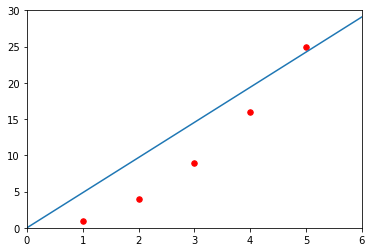

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

mynn = RedeNeural(1,2,1,0.00005);
X = [1,2,3,4,5]
y = [1,4,9,16,25]

mynn.train(X,y,100000)


a = mynn.weight_ih[0]
b = mynn.weight_ho

m = a[0]*b[0] + a[1]*b[1]
print(m)

ex = np.linspace(0,6,10)
ey = m*ex

plt.axis([0,6,0,30])
plt.scatter(X,y,s = 30, c = "red")
plt.plot(ex,ey)


###3.2.2 - Arredondando a derivada para baixo

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def act_func(x):
    return x

def reLu(x):
    return max(x,0.0)


class RedeNeural():
    def __init__(self, n_inputs,n_hidden,n_outputs,learning_rate = 0.1):
        self.n_inputs = n_inputs
        self.n_hidden = n_hidden
        self.n_outputs = n_outputs

        self.weight_ih = np.random.normal(0.0, pow(self.n_inputs, -0.5),
(self.n_hidden, self.n_inputs))
        
  
        self.weight_ih = np.transpose(self.weight_ih)
        self.weight_ho = np.random.normal(0.0, pow(self.n_hidden, -0.5),
(self.n_outputs, self.n_hidden))
        self.weight_ho = np.transpose(self.weight_ho)
        self.learning_rate = learning_rate

    def train_step(self, input,target):

        #  INPUT ====> HIDDEN
        hidden = np.dot(input, self.weight_ih)
        for i in range(self.n_hidden):
            hidden[0][i] = reLu(hidden[0][i])
    
        #  HIDDEN ====> OUTPUT

        output = np.dot(hidden,self.weight_ho)
        for i in range(len(output)):
            output[i] = act_func(output[i])
        
       
        
        #BACKPROPAGATION
        
        ## OUTPUT ==> HIDDEN 
        
        output_error = target - output
        d_output = 1
        gradient = self.learning_rate*output_error*d_output
        
        weight_ho_deltas = np.dot(np.transpose(hidden),gradient)
        
        ## HIDDEN ==> INPUT
        hidden_error = np.dot(output_error,np.transpose(self.weight_ho))
        
        d_hidden = hidden
        d_hidden[d_hidden<=0.0] = 0.0
        d_hidden[d_hidden>0.0] = 1.0
        gradient_H = self.learning_rate*hidden_error*d_hidden
        
        weight_ih_deltas = np.dot(np.transpose(input),gradient_H)
        self.weight_ih = np.add(self.weight_ih,weight_ih_deltas)

        

    def predict(self,input):

        hidden = np.dot(input, self.weight_ih)
        for i in range(len(hidden)):
            hidden[i] = reLu(hidden[i])
     
        #  HIDDEN ====> OUTPUT

        output = np.dot(hidden,self.weight_ho)
        for i in range(len(output)):
            output[i] = act_func(output[i])

        return output[0]
    
    
    def train(self, trainning_set, labels, epochs=1000):
        
        inputs = np.array(trainning_set)
        
        
        for _ in range(epochs):
            index  = np.random.randint(len(trainning_set))
            self.train_step(inputs[index],labels[index])






[4.38160583]


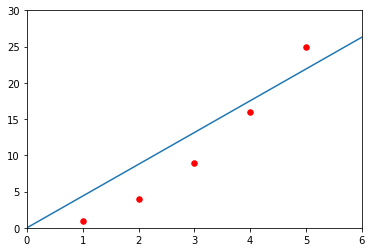

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

mynn = RedeNeural(1,2,1,0.00005);
X = [1,2,3,4,5]
y = [1,4,9,16,25]

mynn.train(X,y,100000)


a = mynn.weight_ih[0]
b = mynn.weight_ho

m = a[0]*b[0] + a[1]*b[1]
print(m)

ex = np.linspace(0,6,10)
ey = m*ex

plt.axis([0,6,0,30])
plt.scatter(X,y,s = 30, c = "red")
plt.plot(ex,ey)


###3.2.3 - Definindo 0.5 para o caso médio

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def act_func(x):
    return x

def reLu(x):
    return max(x,0.0)


class RedeNeural():
    def __init__(self, n_inputs,n_hidden,n_outputs,learning_rate = 0.1):
        self.n_inputs = n_inputs
        self.n_hidden = n_hidden
        self.n_outputs = n_outputs
        
        self.weight_ih = np.random.normal(0.0, pow(self.n_inputs, -0.5),
(self.n_hidden, self.n_inputs))
        
        
        self.weight_ih = np.transpose(self.weight_ih)
        self.weight_ho = np.random.normal(0.0, pow(self.n_hidden, -0.5),
(self.n_outputs, self.n_hidden))
        self.weight_ho = np.transpose(self.weight_ho)
        self.learning_rate = learning_rate

    def train_step(self, input,target):
        
        #  INPUT ====> HIDDEN
        hidden = np.dot(input, self.weight_ih)
        for i in range(self.n_hidden):
            hidden[0][i] = reLu(hidden[0][i])
    
        #  HIDDEN ====> OUTPUT

        output = np.dot(hidden,self.weight_ho)
        for i in range(len(output)):
            output[i] = act_func(output[i])
        
        
        
        #BACKPROPAGATION
        
        ## OUTPUT ==> HIDDEN 
        
        output_error = target - output
        d_output = 1;
        gradient = self.learning_rate*output_error*d_output
        
        weight_ho_deltas = np.dot(np.transpose(hidden),gradient)
        self.weight_ho = np.add(self.weight_ho,weight_ho_deltas)
        
        ## HIDDEN ==> INPUT
        
        hidden_error = np.dot(output_error,np.transpose(self.weight_ho))
        d_hidden = hidden
        d_hidden[d_hidden < 0.0] = 0.0
        d_hidden[d_hidden == 0.0] = 1.0
        d_hidden[d_hidden == 0.5]
        gradient_H = self.learning_rate*hidden_error*d_hidden
       
        weight_ih_deltas = np.dot(np.transpose(input),gradient_H)
        self.weight_ih = np.add(self.weight_ih,weight_ih_deltas)

        

    def predict(self,input):

        hidden = np.dot(input, self.weight_ih)
        for i in range(len(hidden)):
            hidden[i] = reLu(hidden[i])
     
        #  HIDDEN ====> OUTPUT

        output = np.dot(hidden,self.weight_ho)
        for i in range(len(output)):
            output[i] = act_func(output[i])

        return output[0]
    
    
    def train(self, trainning_set, labels, epochs=1000):
        
        inputs = np.array(trainning_set)
        
        
        for _ in range(epochs):
            index  = np.random.randint(len(trainning_set))
            self.train_step(inputs[index],labels[index])






[3.92861681]


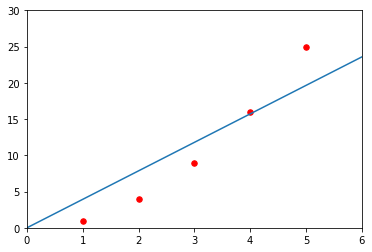

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

mynn = RedeNeural(1,2,1,0.00005);
X = [1,2,3,4,5]
y = [1,4,9,16,25]

mynn.train(X,y,10000)


a = mynn.weight_ih[0]
b = mynn.weight_ho

m = a[0]*b[0] + a[1]*b[1]
print(m)

ex = np.linspace(0,6,10)
ey = m*ex

plt.axis([0,6,0,30])
plt.scatter(X,y,s = 30, c = "red")
plt.plot(ex,ey)
